In [1]:
from os import listdir
import face_detection as fd
import cv2 
import matplotlib.pyplot as plt

In [2]:
mydir = 'C:\\Users\\mika\\Desktop\\Data Science\\Pictures Project\\'
imgdir = 'face_images\\'
resultdir = 'faces_detected\\'
cropdir = 'cropped_face_images\\'

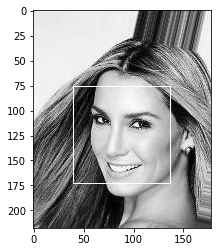

In [4]:
#list of all available files in the directory
files_list = listdir(mydir + imgdir)
#list of all files where a face was detected
images_with_faces = []
for file in files_list:
    img = fd.read(mydir + imgdir + file)
    if fd.is_face(img):
        images_with_faces.append(file[:6]+'.png')
        gray_face = fd.face_detect(img)
        cv2.imwrite(resultdir+file[:6]+'.png', gray_face)

#show the result
img = cv2.imread(mydir + resultdir + images_with_faces[0])
plt.imshow(img)
plt.show()
plt.close()

In [5]:
#image hashing
from myhash import myhash
pictures_hash = []
for file in images_with_faces:
    pictures_hash.append(myhash(resultdir + file))
print(pictures_hash[0])  

f9f1db9c1c1c0e06


In [8]:
# croping an image by the detected face
for file in files_list:
    img = cv2.imread(mydir + imgdir + file)
    cropped = fd.crop(img)
    if cropped is not ():
        cv2.imwrite(cropdir + file, cropped)

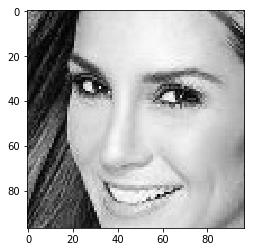

In [10]:
cr_files_list = listdir(mydir + cropdir)
#show the result
img = cv2.imread(mydir + cropdir + cr_files_list[0])
plt.imshow(img)
plt.show()
plt.close()

In [11]:
#count how many images are recognized as faces depending on the size of the image
sd = {}
total = len(cr_files_list)
for size in range(20, 101, 5):
    count = 0
    for file in cr_files_list:
        img = cv2.imread(mydir + cropdir + file, 0)
        img = cv2.resize(img,(size,size))
        if not fd.is_face_sz(img,int(size/10)):
            count += 1
    sd[size] = count/total
    

In [12]:
print('original faces detected ', total)
print(sd)

original faces detected  951
{20: 1.0, 25: 1.0, 30: 0.2797055730809674, 35: 0.19242902208201892, 40: 0.20609884332281808, 45: 0.19242902208201892, 50: 0.1882229232386961, 55: 0.02103049421661409, 60: 0.015772870662460567, 65: 0.017875920084121977, 70: 0.012618296529968454, 75: 0.016824395373291272, 80: 0.008412197686645636, 85: 0.006309148264984227, 90: 0.007360672975814932, 95: 0.010515247108307046, 100: 0.00946372239747634}


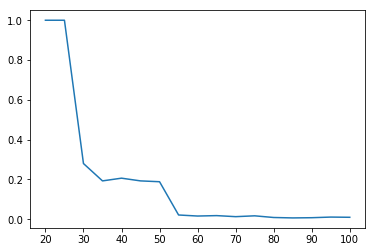

In [13]:
lists = sorted(sd.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()
plt.close()

In [130]:
size = 85
num_pc = 10
num_files = len(cr_files_list[:100])
eigen_vectors = np.empty([num_files, size*num_pc])
eigen_faces = np.empty([num_files, size*num_pc])
eig_mean = np.empty([num_files,size])
for ind in range(num_files):
    img = cv2.imread(mydir + cropdir + cr_files_list[ind], 0)
    img = cv2.resize(img,(size,size))
    mean, eigenVectors = cv2.PCACompute(img, mean=None, maxComponents=num_pc)
    face = cv2.PCAProject(img, mean, eigenVectors)
    eigen_vectors[ind,:] = np.reshape(eigenVectors, [1,size*num_pc])
    eigen_faces[ind,:] = np.reshape(face, [1,size*num_pc])
    eig_mean[ind,:] = mean
    

In [131]:
#find the closest vector in l1
similar = []
for ind in range(num_files):
    v = eigen_vectors[ind]
    x = np.abs(eigen_vectors-v)
    s = np.sum(x, axis=1)
    similar.append(np.argmin(s[np.nonzero(s)]))
print(similar)

[24, 12, 41, 6, 29, 33, 23, 31, 98, 11, 74, 79, 9, 1, 83, 35, 24, 94, 47, 14, 33, 37, 7, 15, 96, 16, 76, 48, 37, 90, 4, 53, 35, 64, 20, 7, 32, 15, 39, 9, 97, 32, 55, 90, 77, 73, 55, 26, 18, 27, 43, 96, 73, 91, 31, 7, 42, 9, 57, 65, 27, 10, 15, 14, 26, 33, 90, 96, 89, 69, 81, 45, 11, 95, 45, 10, 6, 26, 55, 45, 52, 68, 88, 92, 14, 77, 10, 90, 16, 82, 71, 43, 25, 83, 96, 63, 73, 67, 40, 30]


This image


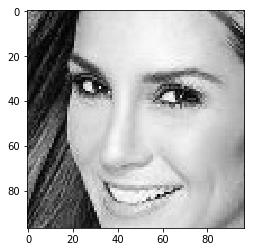

is similar to 


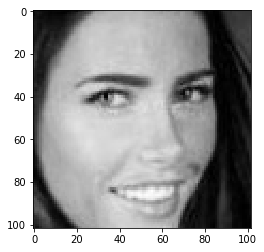

This image


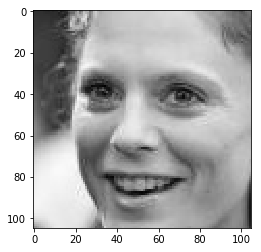

is similar to 


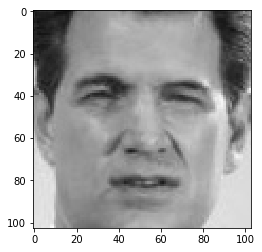

This image


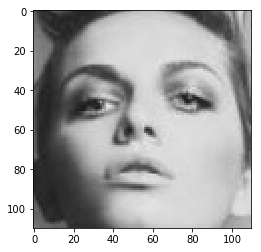

is similar to 


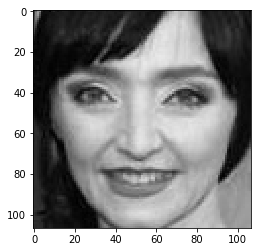

This image


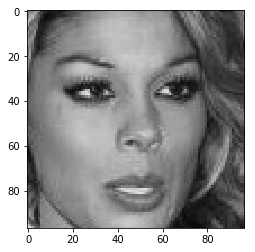

is similar to 


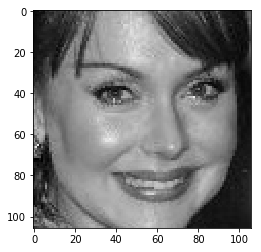

This image


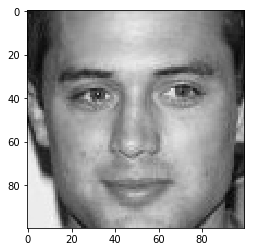

is similar to 


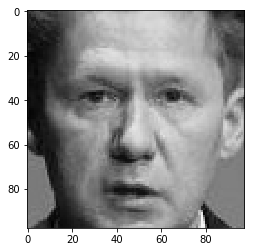

In [135]:
#Similarities in l1 metrix
for i in range(5):
    print('This image')
    img = cv2.imread(mydir + cropdir + cr_files_list[i])
    plt.imshow(img)
    plt.show()
    print('is similar to ')
    img = cv2.imread(mydir + cropdir + cr_files_list[similar[i]])
    plt.imshow(img)
    plt.show()
    plt.close()